In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.rand(len(x_data))

In [32]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [20]:
y_true = (0.5* x_data) + 5 + noise
y_true

array([  5.25643394,   5.82304563,   5.1528429 , ...,  10.35726715,
        10.7581643 ,  10.57518192])

In [18]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y Data'])

In [21]:
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X Data,Y Data
0,0.00000,5.256434
1,0.00001,5.823046
2,0.00002,5.152843
3,0.00003,5.050262
4,0.00004,5.722030


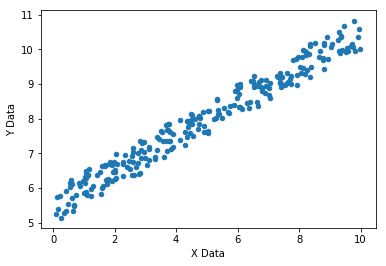

In [22]:
my_data.sample(n=250).plot(kind="scatter",x="X Data",y="Y Data")

In [23]:
batch_size = 8

In [25]:
m = tf.Variable(0.71)
b = tf.Variable(0.20)
xPh = tf.placeholder(tf.float32,[batch_size])
yPh = tf.placeholder(tf.float32,[batch_size])

In [27]:
y_model = m*xPh + b

In [29]:
loss = tf.reduce_sum(tf.square(yPh-y_model))
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [33]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batch = 1000;
    for i in range(batch):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        print(x_data[rand_ind])
        _,batch_loss = sess.run([train,loss],feed_dict={xPh:x_data[rand_ind],yPh:y_true[rand_ind]})
        print(batch_loss)
    

[ 1.13977114  3.49106349  1.44808145  0.02384002  6.23047623  6.8017468
  8.4023184   1.0996311 ]
159.548
[ 0.92138092  5.76379576  6.57127657  6.1036961   0.16104016  7.60768761
  3.1047731   0.08013008]
111.325
[ 3.7002237   8.59092859  3.63156363  2.26937227  0.64055064  8.83082883
  2.3025823   1.93386193]
86.924
[ 7.23030723  8.97812898  3.92296392  9.65499965  4.49163449  8.18355818
  9.40562941  2.00910201]
28.9587
[ 6.96979697  5.27640528  8.34171834  5.02815503  0.78884079  8.04896805
  6.43882644  7.05189705]
26.333
[ 4.58873459  8.58582859  5.88707589  9.11770912  4.92028492  6.50889651
  8.08862809  7.84318784]
11.0027
[ 5.48090548  7.85144785  9.94650995  3.37877338  0.7975708   5.09120509
  5.58425558  8.75751876]
34.9152
[ 4.01657402  5.34461534  5.21238521  8.66826867  0.01399001  1.53701154
  1.37660138  5.7015257 ]
69.8413
[ 6.47936648  2.73173273  8.98470898  7.37065737  2.84437284  1.60596161
  6.996947    2.49428249]
44.4278
[ 7.55963756  5.38224538  2.17182217  1.

9.43109
[ 1.3998614   6.02626603  1.06233106  4.13096413  1.5997716   4.46167446
  5.21290521  5.34302534]
16.322
[ 8.53657854  7.00695701  0.55531056  0.64781065  6.30816631  0.58742059
  8.0987381   9.16585917]
18.9091
[ 1.76222176  1.94405194  9.45984946  2.7025227   4.12340412  9.34415934
  9.26721927  0.15407015]
16.1723
[ 7.61977762  5.10751511  5.63773564  7.41238741  2.31557232  0.13760014
  1.26244126  9.25174925]
16.246
[ 8.13851814  7.02436702  3.93120393  8.82758883  7.28434728  6.12982613
  1.69111169  5.98015598]
9.04773
[ 5.83080583  5.74082574  2.07316207  7.15644716  9.67776968  0.57544058
  2.82772283  1.08157108]
16.7201
[ 7.69353769  4.51099451  7.52284752  2.96199296  2.47269247  5.44809545
  8.28826829  9.14515915]
6.89087
[ 0.60669061  3.23488323  6.18661619  6.12410612  3.82003382  3.98872399
  1.23631124  0.16642017]
21.7575
[ 2.07933208  2.92154292  7.2980473   2.15895216  4.50552451  7.47074747
  3.17505318  3.60952361]
14.8225
[ 0.88575089  0.58132058  4.833

3.05978
[ 9.24681925  3.4032334   2.21029221  4.26112426  4.39264439  2.30885231
  9.96699997  7.79118779]
4.17481
[ 0.52001052  3.08272308  5.98436598  5.91041591  3.21564322  7.77860778
  1.16678117  3.78494378]
4.19568
[ 2.9000529   4.22981423  8.17107817  7.7983178   4.98137498  0.01666002
  1.94998195  9.31745932]
5.58535
[ 2.84646285  8.86146886  0.87546088  7.10754711  4.92296492  8.2034382
  5.32998533  7.3957374 ]
4.6534
[ 6.18325618  6.81633682  3.88324388  5.42727543  1.05577106  3.03413303
  4.72519473  0.39410039]
4.62331
[ 8.92743893  6.66139666  0.70671071  2.33782234  8.66825867  4.76905477
  1.51397151  4.53772454]
4.27912
[ 3.44180344  4.96914497  2.42018242  0.40625041  5.23113523  3.12951313
  4.18682419  0.89371089]
5.42083
[ 1.93249193  7.43254743  4.50626451  5.53131553  7.09068709  1.01276101
  9.63643964  9.41278941]
4.94128
[ 4.73877474  7.17431717  1.20711121  5.81954582  7.41096741  4.12548413
  7.6961777   2.98526299]
3.82808
[ 4.46793447  3.52995353  4.576

0.858462
[ 0.98046098  8.28431828  0.06488006  0.01188001  7.24832725  6.07493607
  6.39162639  3.73590374]
0.904157
[ 7.2975973   8.74715875  9.94546995  3.004263    4.20890421  7.6957977
  2.88335288  3.9017439 ]
1.84809
[ 7.12910713  5.72530573  0.62570063  7.94337794  2.96130296  7.47879748
  5.86521587  7.21608722]
1.66952
[ 6.12370612  9.87084987  5.52059552  8.68602869  2.71277271  9.07012907
  2.86009286  7.70994771]
0.352354
[ 3.53639354  0.96016096  8.65885866  4.50713451  3.32637333  3.02985303
  2.88582289  5.24353524]
1.17341
[ 5.93137593  9.32966933  7.02649703  2.31692232  2.04749205  1.38216138
  3.84995385  7.90635791]
2.44401
[ 5.14454514  4.58576459  4.36702437  2.9031529   0.78450078  4.52255452
  4.41515442  5.11081511]
2.27166
[ 4.41563442  1.82373182  2.98241298  5.06911507  4.93623494  7.89301789
  4.12688413  8.61182861]
1.49965
[ 8.92566893  7.6990877   4.69456469  6.38063638  1.06544107  9.79434979
  5.94330594  5.98744599]
0.761022
[ 1.82980183  9.98744999  

[ 3.14079314  1.73895174  5.03002503  5.09449509  5.23856524  3.19269319
  4.34268434  5.84654585]
0.787423
[ 0.17271017  6.70986671  3.07463307  7.27208727  6.8021468   9.97478997
  0.93134093  6.84547685]
1.095
[ 4.33161433  4.26975427  9.41763942  8.97991898  0.62291062  1.22701123
  4.998985    5.61078561]
1.74333
[ 1.08106108  7.46118746  7.83329783  3.26867327  0.49194049  7.30800731
  8.67567868  8.44319844]
1.17545
[ 8.85691886  3.97254397  6.44056644  8.55647856  8.40736841  1.27341127
  8.4007084   3.14296314]
1.20995
[ 0.8972009   4.36402436  4.8020348   5.04216504  1.91082191  2.53398253
  6.4026664   8.08378808]
0.979414
[ 1.88110188  2.17670218  8.44941845  1.32911133  0.40549041  3.36704337
  9.94662995  7.46370746]
1.55559
[ 2.67828268  6.001646    0.53237053  3.28956329  9.81758982  1.71873172
  2.68910269  8.85502886]
0.648039
[ 3.44599345  1.42040142  7.14600715  6.73195673  0.58471058  2.60875261
  3.15463315  0.04068004]
1.2937
[ 8.57441857  9.95306995  7.92715793 

[ 8.43723844  9.06874907  7.75916776  1.62909163  3.83825384  2.54602255
  8.88586889  5.78364578]
0.874982
[ 4.42778443  2.43769244  4.13831414  8.13585814  9.29306929  6.83706684
  4.18997419  0.17029017]
1.17252
[ 8.31786832  9.1950992   4.29144429  8.12480812  7.96152796  6.37586638
  5.34574535  9.31096931]
1.05534
[ 2.8012828   4.90805491  1.65703166  4.71966472  0.04010004  8.40577841
  5.31439531  3.002103  ]
0.937186
[ 7.42254742  9.03236903  5.89083589  7.11524712  6.11507612  7.28731729
  1.74184174  3.88047388]
0.795517
[ 6.27278627  9.24841925  9.67152967  5.58230558  4.13205413  3.15287315
  6.01613602  3.91823392]
0.594935
[ 9.50992951  0.54495054  5.48422548  9.53754954  1.35754136  8.10623811
  1.21851122  8.30822831]
1.2102
[ 2.67002267  6.01602602  8.94053894  7.27295727  2.31792232  4.37952438
  3.71809372  7.47058747]
0.77955
[ 1.72975173  2.82241282  8.45396845  4.43466443  1.17299117  0.27911028
  2.995323    2.50866251]
1.35954
[ 2.47133247  6.62303662  0.402380